### Exploratory Data Analysis of Homer Segementation Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# from kmodes import kmodes, kprototypes
import scipy.stats as scs
import seaborn as sns
from homer_clean_data import remove_outliers
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

df_users = pd.read_pickle('data/df_users.pkl')
df = pd.read_pickle('data/df.pkl')

In [2]:
df.shape

(176290, 20)

In [3]:
df_users.shape

(8741, 21)

In [4]:
df_users['NumSims'].describe()

count    8741.000000
mean       20.168173
std        75.455460
min         1.000000
25%         1.000000
50%         4.000000
75%        15.000000
max      3211.000000
Name: NumSims, dtype: float64

In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 21 columns):
UserId                 8741 non-null object
NumSims                8741 non-null int64
UserRole               8741 non-null category
OrganizationType       8741 non-null category
Latitude               8741 non-null float64
Longitude              8741 non-null float64
ImportedWind           8741 non-null int64
ImportedSolar          8741 non-null int64
ElectricNotDefault     8741 non-null int64
GeneratorNotDefault    8741 non-null int64
GenCapCost             8741 non-null int64
BatCapCost             8741 non-null int64
WindCapCost            8741 non-null int64
PvCapCost              8741 non-null int64
GenCostMultiLines      8741 non-null int64
WindCostMultiLines     8741 non-null int64
BatCostMultiLines      8741 non-null int64
PvCostMultiLines       8741 non-null int64
ConCostMultiLines      8741 non-null int64
NumChangedInputs       8741 non-null int64
Country               

In [6]:
df_users.UserRole.value_counts(dropna=False)

Academic     4305
Technical    2412
NA           1330
Business      694
Name: UserRole, dtype: int64

In [7]:
df_users.OrganizationType.value_counts(dropna=False)

Academic       3613
NA             2730
Engineering    1719
Vendor          340
Public          175
Service         164
Name: OrganizationType, dtype: int64

In [8]:
df_users.describe()

,NumSims,Latitude,Longitude,ImportedWind,ImportedSolar,ElectricNotDefault,GeneratorNotDefault,GenCapCost,BatCapCost,WindCapCost,PvCapCost,GenCostMultiLines,WindCostMultiLines,BatCostMultiLines,PvCostMultiLines,ConCostMultiLines,NumChangedInputs
count,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000
mean,20.168173,21.492148,9.799315,0.026885,0.064409,0.947146,0.795676,0.459902,0.317584,0.313694,0.861686,0.010296,0.010868,0.010868,0.052168,0.032033,3.903215
std,75.455460,27.440464,83.776854,0.161756,0.245494,0.223755,0.403230,0.498418,0.465563,0.464020,0.345249,0.100953,0.103689,0.103689,0.222378,0.176098,1.226804
min,1.000000,-107.083333,-379.511719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.492300,-72.249523,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,4.000000,30.375321,13.315430,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,15.000000,40.901556,77.594563,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,3211.000000,89.218111,373.007812,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


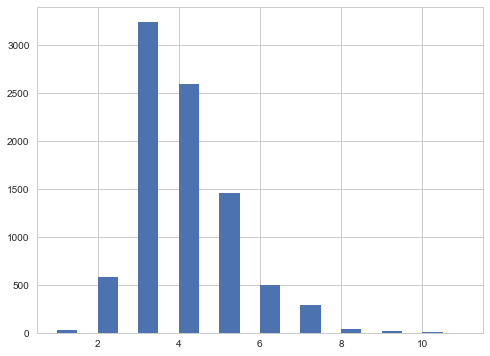

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist(df_users['NumChangedInputs'], bins=20)
plt.show()

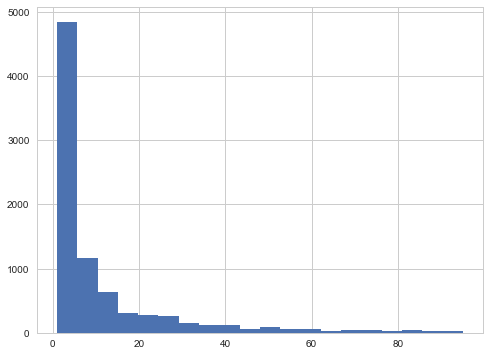

In [10]:
sims = df_users['NumSims'].values
mu = sims.mean()
std = sims.std()
sims = [s for s in sims if s <= mu + std and s >= mu - std]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist(sims, bins=20)
plt.show()

### EDA with clustered data (by user and simulation)

In [11]:
df_users_clustered = pd.read_pickle('data/df_users_clustered.pkl')
df_clustered = pd.read_pickle('data/df_clustered.pkl')

In [12]:
df_users_clustered.shape

(8741, 22)

In [13]:
df_clustered.shape

(176290, 21)

In [14]:
df_users_clustered.columns

Index(['UserId', 'NumSims', 'UserRole', 'OrganizationType', 'Latitude',
       'Longitude', 'ImportedWind', 'ImportedSolar', 'ElectricNotDefault',
       'GeneratorNotDefault', 'GenCapCost', 'BatCapCost', 'WindCapCost',
       'PvCapCost', 'GenCostMultiLines', 'WindCostMultiLines',
       'BatCostMultiLines', 'PvCostMultiLines', 'ConCostMultiLines',
       'NumChangedInputs', 'Country', 'KM_Cluster'],
      dtype='object')

In [15]:
bool_cols = ('ImportedWind', 'ImportedSolar', 'GenCostMultiLines', 'WindCostMultiLines',
       'BatCostMultiLines', 'PvCostMultiLines', 'ConCostMultiLines', 'ElectricNotDefault', 'GeneratorNotDefault', 
        'GenCapCost', 'BatCapCost', 'WindCapCost', 'PvCapCost')

for col in bool_cols:
    df_users_clustered[col] = df_users_clustered[col].astype(bool)
    df_clustered[col] = df_clustered[col].astype(bool)

In [16]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176290 entries, 0 to 176289
Data columns (total 21 columns):
UserRole               176290 non-null category
OrganizationType       176290 non-null category
Latitude               176290 non-null float64
Longitude              176290 non-null float64
User                   176290 non-null object
Created                176290 non-null datetime64[ns]
ImportedWind           176290 non-null bool
ImportedSolar          176290 non-null bool
ElectricNotDefault     176290 non-null bool
GeneratorNotDefault    176290 non-null bool
GenCapCost             176290 non-null bool
BatCapCost             176290 non-null bool
WindCapCost            176290 non-null bool
PvCapCost              176290 non-null bool
GenCostMultiLines      176290 non-null bool
WindCostMultiLines     176290 non-null bool
BatCostMultiLines      176290 non-null bool
PvCostMultiLines       176290 non-null bool
ConCostMultiLines      176290 non-null bool
Country                1762

In [17]:
# User clusters by clustering algorithm
# AG_0_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 0]
# AG_1_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 1]
# AG_2_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 2]
# AG_3_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 3]
# AG_4_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 4]

KM_0_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 0]
KM_1_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 1]
KM_2_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 2]
KM_3_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 3]
KM_4_u = df_users_clustered[df_users_clustered['KM_Cluster'] == 4]

# GM_0_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 0]
# GM_1_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 1]
# GM_2_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 2]
# GM_3_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 3]

# Simulation clusters by clustering algorithm
# AG_0_s = df_clustered[df_users_clustered['AG_Cluster'] == 0]
# AG_1_s = df_clustered[df_users_clustered['AG_Cluster'] == 1]
# AG_2_s = df_clustered[df_users_clustered['AG_Cluster'] == 2]
# AG_3_s = df_clustered[df_users_clustered['AG_Cluster'] == 3]

KM_0_s = df_clustered[df_clustered['KM_Cluster'] == 0]
KM_1_s = df_clustered[df_clustered['KM_Cluster'] == 1]
KM_2_s = df_clustered[df_clustered['KM_Cluster'] == 2]
KM_3_s = df_clustered[df_clustered['KM_Cluster'] == 3]
KM_4_s = df_clustered[df_clustered['KM_Cluster'] == 4]

# GM_0_s = df_clustered[df_users_clustered['GM_Cluster'] == 0]
# GM_1_s = df_clustered[df_users_clustered['GM_Cluster'] == 1]
# GM_2_s = df_clustered[df_users_clustered['GM_Cluster'] == 2]
# GM_3_s = df_clustered[df_users_clustered['GM_Cluster'] == 3]

In [48]:
# User role distributions per cluster
# print('AG Cluster 0')
# print(AG_0_u.UserRole.value_counts(dropna=False))
# print('\n')
# print('AG Cluster 1')
# print(AG_1_u.UserRole.value_counts(dropna=False))
# print('\n')
# print('AG Cluster 2')
# print(AG_2_u.UserRole.value_counts(dropna=False))
# print('\n')
# print('AG Cluster 3')
# print(AG_3_u.UserRole.value_counts(dropna=False))
# print('AG Cluster 4')
# print(AG_4_u.UserRole.value_counts(dropna=False))

# grp = df_users_clustered.groupby('AG_Cluster')['UserRole'].count()
# grp.plot(kind='bar').set_ylabel('Number of Users');

KM Cluster 0
Academic     1120
Technical     409
Business      123
NA             88
Name: UserRole, dtype: int64


KM Cluster 1
Academic     2802
Business      332
Technical     204
NA            189
Name: UserRole, dtype: int64


KM Cluster 2
Academic     263
Technical    116
NA            35
Business      27
Name: UserRole, dtype: int64


KM Cluster 3
Technical    1339
NA            465
Business       80
Academic        0
Name: UserRole, dtype: int64


KM Cluster 4
NA           553
Technical    344
Business     132
Academic     120
Name: UserRole, dtype: int64


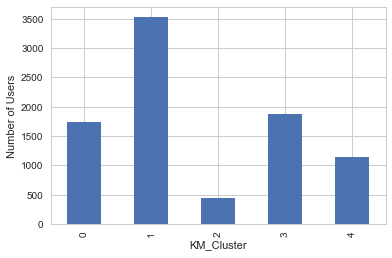

In [18]:
# User role distributions per cluster
print('KM Cluster 0')
print(KM_0_u.UserRole.value_counts(dropna=False))
print('\n')
print('KM Cluster 1')
print(KM_1_u.UserRole.value_counts(dropna=False))
print('\n')
print('KM Cluster 2')
print(KM_2_u.UserRole.value_counts(dropna=False))
print('\n')
print('KM Cluster 3')
print(KM_3_u.UserRole.value_counts(dropna=False))
print('\n')
print('KM Cluster 4')
print(KM_4_u.UserRole.value_counts(dropna=False))

grp = df_users_clustered.groupby('KM_Cluster')['UserRole'].count()
grp.plot(kind='bar').set_ylabel('Number of Users');

In [50]:
# Mean number of simulations per user cluster
# print(df_users_clustered.AG_Cluster.value_counts(dropna=False))
# grp = df_users_clustered.groupby('AG_Cluster')['NumSims'].mean()
# grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [ ]:
# print(df_users_clustered.GM_Cluster.value_counts(dropna=False))
# grp = df_users_clustered.groupby('GM_Cluster')['NumSims'].mean()
# grp.plot(kind='bar').set_ylabel('Number of Simulations');

1    3527
3    1884
0    1740
4    1149
2     441
Name: KM_Cluster, dtype: int64


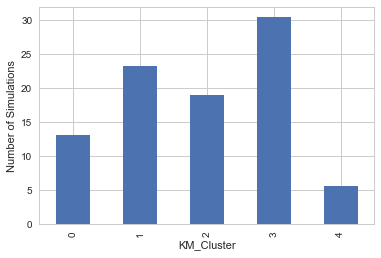

In [19]:
print(df_users_clustered.KM_Cluster.value_counts(dropna=False))
grp = df_users_clustered.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [20]:
df['Created'].head()

0   2016-06-30 23:54:38
1   2016-03-11 09:31:09
2   2017-02-09 11:03:23
3   2016-03-15 09:20:52
4   2015-04-22 11:23:22
Name: Created, dtype: datetime64[ns]

<function matplotlib.pyplot.show>

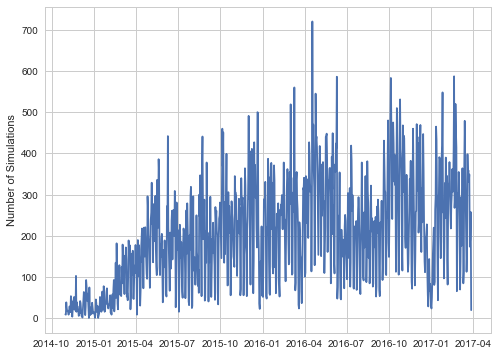

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

date_count = df_clustered.groupby(df_clustered['Created'].dt.date)['User'].count()
ax.plot(date_count)
ax.set_ylabel('Number of Simulations')
plt.show()

In [22]:
sum(date_count)

176290

In [ ]:
# categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['GM_Cluster', 'UserRole'])['NumSims'].mean()
# print(agg)
# agg = agg.unstack(level='UserRole')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

KM_Cluster  UserRole 
0           Academic     13.008036
            Business     24.918699
            NA           11.193182
            Technical     9.767726
1           Academic     20.533547
            Business     42.909639
            NA           29.968254
            Technical    20.862745
2           Academic     16.935361
            Business     10.296296
            NA           55.514286
            Technical    14.336207
3           Business     32.287500
            NA           17.520430
            Technical    34.707244
4           Academic      4.241667
            Business      4.833333
            NA            7.497288
            Technical     3.316860
Name: NumSims, dtype: float64
UserRole     Academic   Business         NA  Technical
KM_Cluster                                            
0           13.008036  24.918699  11.193182   9.767726
1           20.533547  42.909639  29.968254  20.862745
2           16.935361  10.296296  55.514286  14.336207
3       

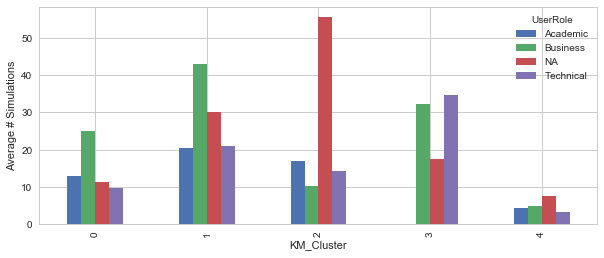

In [23]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'UserRole'])['NumSims'].mean()
print(agg)
agg = agg.unstack(level='UserRole')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

In [ ]:
# categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['AG_Cluster', 'UserRole'])['NumSims'].mean()
# print(agg)
# agg = agg.unstack(level='UserRole')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

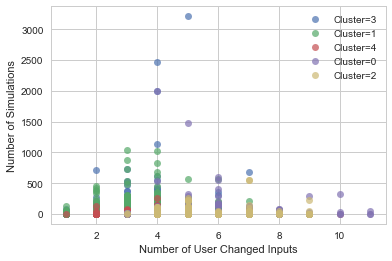

In [24]:
# Scatter plot by category
clusters = df_users_clustered['KM_Cluster'].unique()
for clust in clusters:
    plt.plot(df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'NumChangedInputs'], 
             df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'NumSims'], 
             linestyle='',
             marker='o',
             alpha=.7, label='Cluster={}'.format(clust))
plt.xlabel('Number of User Changed Inputs')
plt.ylabel('Number of Simulations')
plt.legend(numpoints=1);

In [26]:
df_users_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 22 columns):
UserId                 8741 non-null object
NumSims                8741 non-null int64
UserRole               8741 non-null category
OrganizationType       8741 non-null category
Latitude               8741 non-null float64
Longitude              8741 non-null float64
ImportedWind           8741 non-null bool
ImportedSolar          8741 non-null bool
ElectricNotDefault     8741 non-null bool
GeneratorNotDefault    8741 non-null bool
GenCapCost             8741 non-null bool
BatCapCost             8741 non-null bool
WindCapCost            8741 non-null bool
PvCapCost              8741 non-null bool
GenCostMultiLines      8741 non-null bool
WindCostMultiLines     8741 non-null bool
BatCostMultiLines      8741 non-null bool
PvCostMultiLines       8741 non-null bool
ConCostMultiLines      8741 non-null bool
NumChangedInputs       8741 non-null int64
Country                8741 non-nul

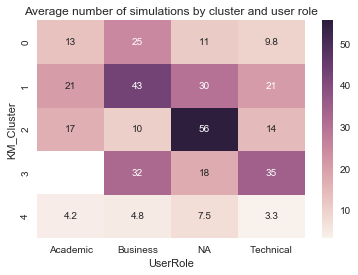

In [27]:
# Heat-map
agg = df_users_clustered.groupby(['KM_Cluster', 'UserRole'])['NumSims'].mean()
ax = sns.heatmap(agg.unstack(level='UserRole'), annot=True)
ax.set_title('Average number of simulations by cluster and user role')

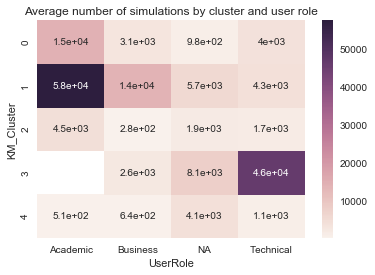

In [57]:
# Heat-map
agg = df_clustered.groupby(['KM_Cluster', 'UserRole'])['UserRole'].count()
ax = sns.heatmap(agg.unstack(level='UserRole'), annot=True)
ax.set_title('Average number of simulations by cluster and user role')

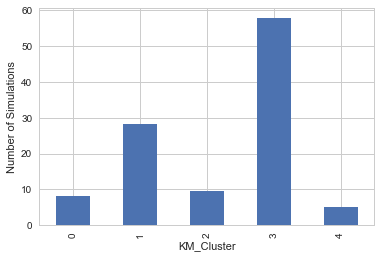

In [30]:
df_usa = df_users_clustered[df_users_clustered['Country'] == 'US']
df_usa.head()

grp = df_usa.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [ ]:
# categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['GM_Cluster', 'OrganizationType'])['OrganizationType'].count()
# print(agg)
# agg = agg.unstack(level='OrganizationType')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

KM_Cluster  OrganizationType
0           Academic             981
            Engineering          299
            NA                   340
            Public                39
            Service               22
            Vendor                59
1           Academic            2392
            Engineering          388
            NA                   530
            Public                64
            Service               56
            Vendor                97
2           Academic             197
            Engineering           47
            NA                   172
            Public                 5
            Service               10
            Vendor                10
3           Engineering          687
            NA                  1018
            Public                35
            Service               37
            Vendor               107
4           Academic              43
            Engineering          298
            NA                   670
         

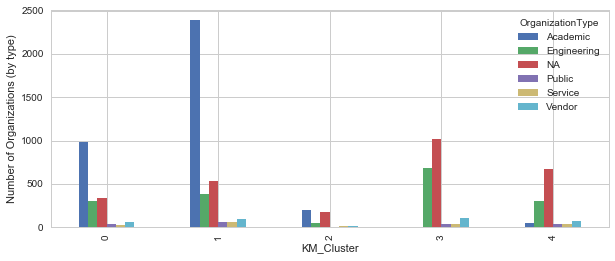

In [31]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'OrganizationType'])['OrganizationType'].count()
print(agg)
agg = agg.unstack(level='OrganizationType')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

In [ ]:
# Categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['AG_Cluster', 'OrganizationType'])['OrganizationType'].count()
# print(agg)
# agg = agg.unstack(level='OrganizationType')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

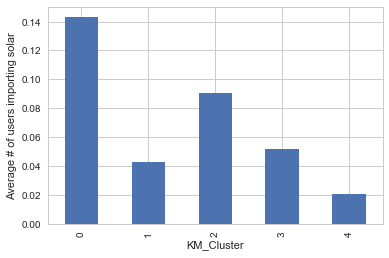

In [33]:
grp = df_users_clustered.groupby('KM_Cluster')['ImportedSolar'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing solar');

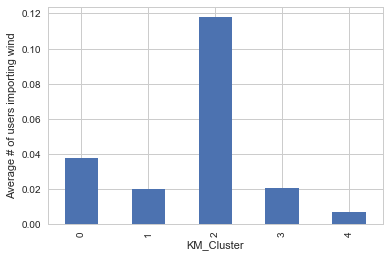

In [34]:
grp = df_users_clustered.groupby('KM_Cluster')['ImportedWind'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing wind');

In [ ]:
df_users_clustered.info()

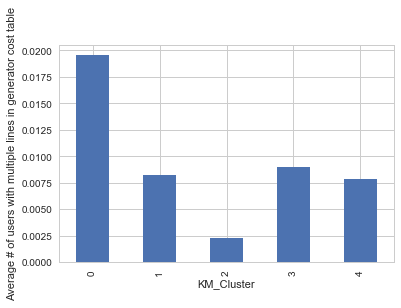

In [35]:
grp = df_users_clustered.groupby('KM_Cluster')['GenCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in generator cost table');

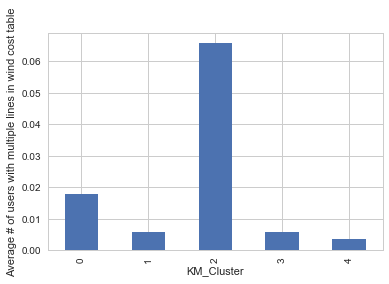

In [36]:
grp = df_users_clustered.groupby('KM_Cluster')['WindCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in wind cost table');

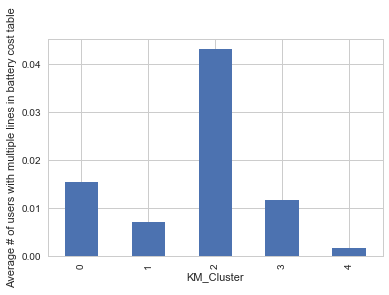

In [37]:
grp = df_users_clustered.groupby('KM_Cluster')['BatCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in battery cost table');

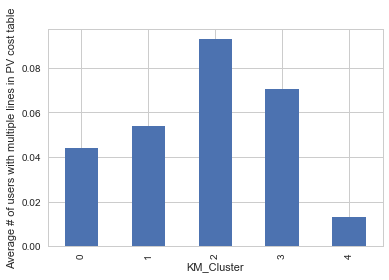

In [38]:
grp = df_users_clustered.groupby('KM_Cluster')['PvCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in PV cost table');

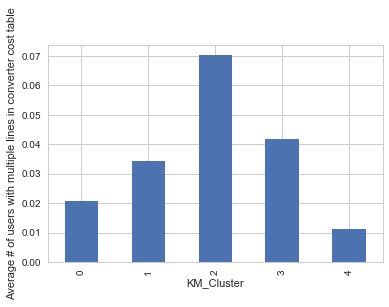

In [39]:
grp = df_users_clustered.groupby('KM_Cluster')['ConCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in converter cost table');

In [71]:
df_users_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 22 columns):
UserId                 8741 non-null object
NumSims                8741 non-null int64
UserRole               8741 non-null category
OrganizationType       8741 non-null category
Latitude               8741 non-null float64
Longitude              8741 non-null float64
ImportedWind           8741 non-null bool
ImportedSolar          8741 non-null bool
ElectricNotDefault     8741 non-null bool
GeneratorNotDefault    8741 non-null bool
GenCapCost             8741 non-null bool
BatCapCost             8741 non-null bool
WindCapCost            8741 non-null bool
PvCapCost              8741 non-null bool
GenCostMultiLines      8741 non-null bool
WindCostMultiLines     8741 non-null bool
BatCostMultiLines      8741 non-null bool
PvCostMultiLines       8741 non-null bool
ConCostMultiLines      8741 non-null bool
NumChangedInputs       8741 non-null int64
Country                8741 non-nul

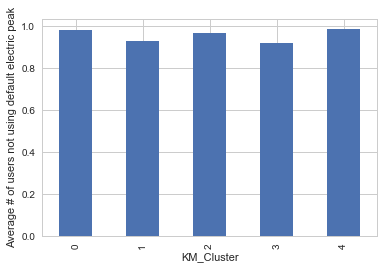

In [40]:
grp = df_users_clustered.groupby('KM_Cluster')['ElectricNotDefault'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users not using default electric peak');

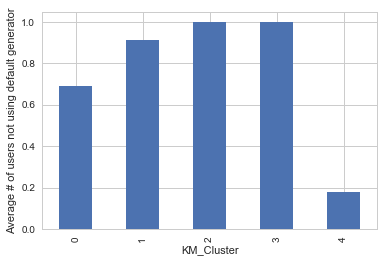

In [41]:
grp = df_users_clustered.groupby('KM_Cluster')['GeneratorNotDefault'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users not using default generator');

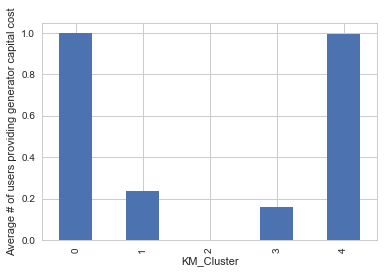

In [42]:
grp = df_users_clustered.groupby('KM_Cluster')['GenCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing generator capital cost');

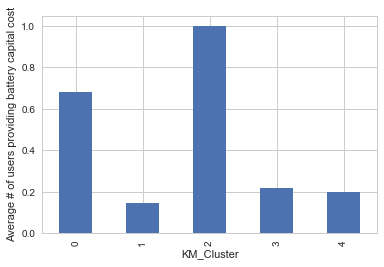

In [43]:
grp = df_users_clustered.groupby('KM_Cluster')['BatCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing battery capital cost');

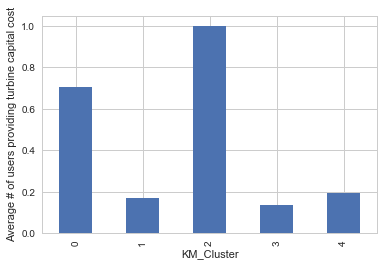

In [44]:
grp = df_users_clustered.groupby('KM_Cluster')['WindCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing turbine capital cost');

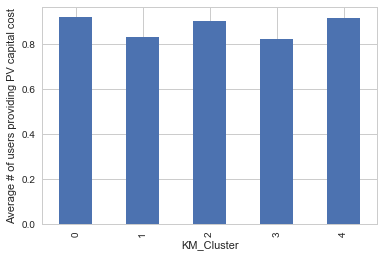

In [45]:
grp = df_users_clustered.groupby('KM_Cluster')['PvCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing PV capital cost');

In [ ]:
# np.round(cluster3[['NumSims', 'DaysSinceFirst']].describe(), 2).T[['count','mean', 'std', 'min', 'max']]

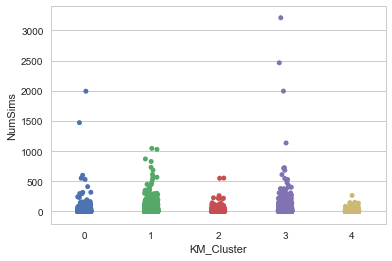

In [47]:
# df_users_clustered_clean = remove_outliers(df_users_clustered)

sns.stripplot(x='KM_Cluster', y='NumSims', data=df_users_clustered, jitter=True);

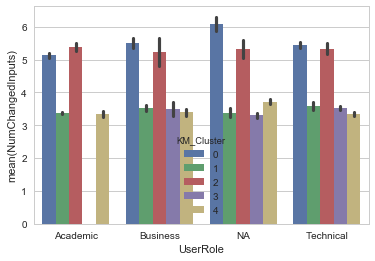

In [48]:
# sns.violinplot(x='NumSims', y='KM_Cluster', hue='UserRole', data=df_users_clustered_clean);
sns.barplot(x='UserRole', y='NumChangedInputs', hue='KM_Cluster', data=df_users_clustered);

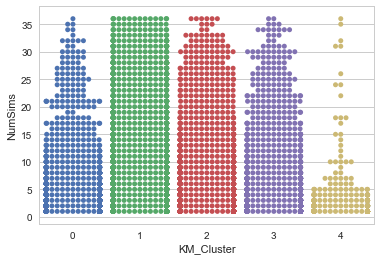

In [27]:
sns.swarmplot(x='KM_Cluster', y='NumSims', data=df_users_clustered);

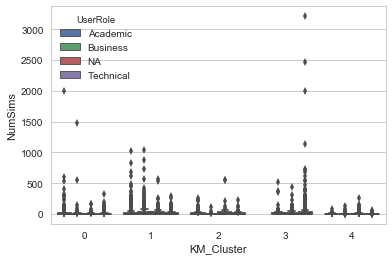

In [49]:
sns.boxplot(x='KM_Cluster', y='NumSims', hue='UserRole', data=df_users_clustered);

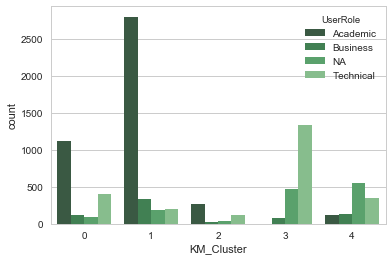

In [50]:
sns.countplot(x='KM_Cluster', hue='UserRole', data=df_users_clustered, palette="Greens_d");

In [52]:
np.max(df_users_clustered['NumSims'])

3211

In [53]:
df_users_clustered['NumSims'].describe()

count    8741.000000
mean       20.168173
std        75.455460
min         1.000000
25%         1.000000
50%         4.000000
75%        15.000000
max      3211.000000
Name: NumSims, dtype: float64

In [22]:
df_users_clustered.shape

(8741, 22)

In [23]:
df_users_clustered_clean.shape

(7698, 22)

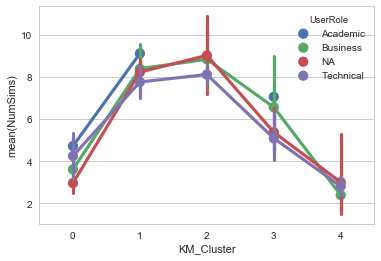

In [25]:
sns.pointplot(x='KM_Cluster', y='NumSims', hue='UserRole', data=df_users_clustered_clean);

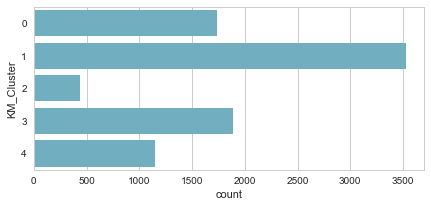

In [54]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='KM_Cluster', data=df_users_clustered, color="c");

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176290 entries, 0 to 176289
Data columns (total 20 columns):
UserRole               176290 non-null category
OrganizationType       176290 non-null category
Latitude               176290 non-null float64
Longitude              176290 non-null float64
User                   176290 non-null object
Created                176290 non-null datetime64[ns]
ImportedWind           176290 non-null int64
ImportedSolar          176290 non-null int64
ElectricNotDefault     176290 non-null int64
GeneratorNotDefault    176290 non-null int64
GenCapCost             176290 non-null int64
BatCapCost             176290 non-null int64
WindCapCost            176290 non-null int64
PvCapCost              176290 non-null int64
GenCostMultiLines      176290 non-null int64
WindCostMultiLines     176290 non-null int64
BatCostMultiLines      176290 non-null int64
PvCostMultiLines       176290 non-null int64
ConCostMultiLines      176290 non-null int64
Country       